<h1 style="text-align: center;" > KNN Model: Classification Problem </h1>

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics._plot import confusion_matrix

In [4]:
#importing the dataset

data = load_iris()
print(data.data.shape)

(150, 4)


In [5]:
data_df = pd.DataFrame(data.data, columns=["Sepal length", 'sepal width', 'petal length', 'petal width'])

data_df.head()

,Sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(1.5, 3.9000000000000004)

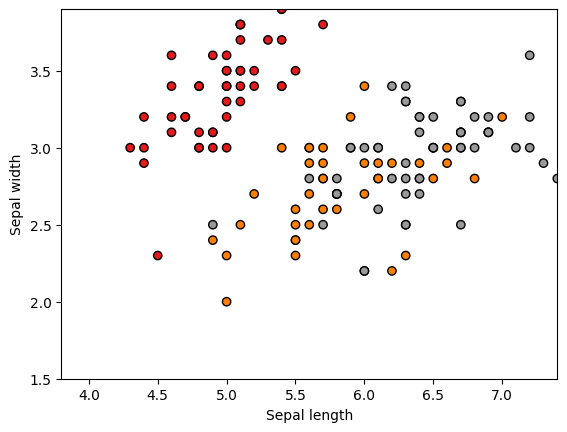

In [6]:
x = data.data[:,:2]
y= data.target

x_min, x_max = x[:,0].min()-0.5, x[:,0].max()-0.5
y_min, y_max = x[:,1].min()-0.5, x[:,1].max()-0.5

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Set1, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)



In [7]:
#dividing the dataset into training and testing sets
X = data.data
Y = data.target

x_train, x_test, y_train, y_test, = train_test_split(X,Y,test_size=0.2, random_state=42)

In [8]:
#training our knn model

nbr = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
nbr.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [9]:
#testing the model nbr

classification_results = nbr.predict(x_test)
print(classification_results)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [10]:
print(metrics.classification_report(classification_results, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
from sklearn.metrics import plot_confusion_matrix
title_options = [("Confusion Matrix", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(nbr,x_test,y_test, cmap = plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


TypeError: 'module' object is not callable